The **Blasius profile** is needed to be calculated before solving the eigenvalue problem. It leads us to the Blasius equation which can be solved numerically. Thus, our task is to define the opportune numerical method.
All of the known numerical methods can be divided into those that are explicit and into those that are implicit. Primarily our choice must proceed from the answering the question if our ODE-system is stiff or not. The explicit methods are not applicable if we are dealing with stiff system because of the rapid increasing of the number of solutions when the step size is sufficiently small. 

There's no universal definition of stiffness, but there's no actual need to check it analytically. I begin from the guess that the system isn't stiff. I use an explicit Runge-Kutta method of order 4 which is built into *scipy.integrate.ode()* function. Fortunatelly, the integrator has such a property that it's automatically interrupted when the rapid increasing of the number of solutions happens.

Accordong to the *Liu's paper*, $0\le\bar{z}\le93.75$ in the non-dimensional units (I take upper limit to be 66.3 because I apply the boundary layer thikness to be $\delta=\sqrt{\frac{\dot{2x\nu}}{U_0}}$ and solve Blasius equation without factor 2). I consider longer interval - $0\le\bar{z}\le141,4$ (or $0\le\bar{z}\le100$ when $\delta=\sqrt{\frac{\dot{2x\nu}}{U_0}}$).

/usr/local/lib/python3.4/dist-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: problem is probably stiff (interrupted)
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


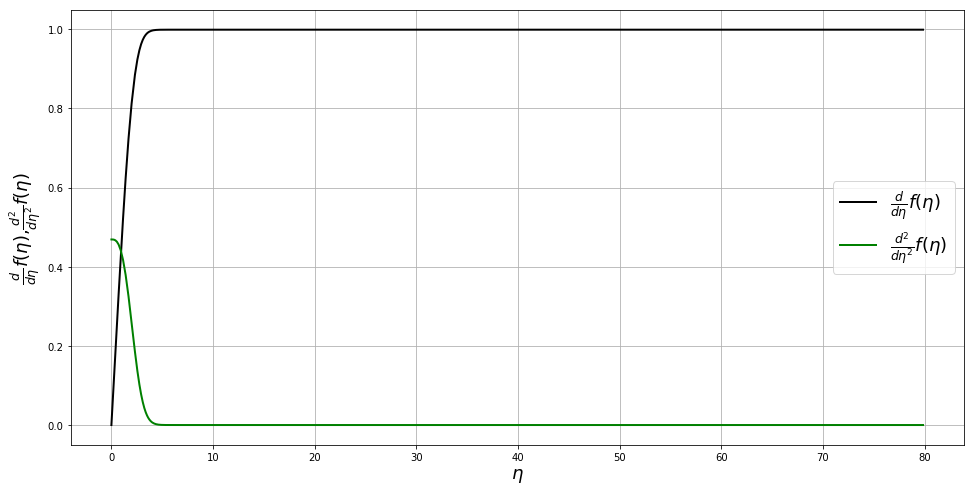

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

#Creating the lists to save the current value of independent variable
#And the corresponding value of the function f.
ts=[]
ys=[]

def g(t,y):
    ts.append(t)
    ys.append(list(y.copy()))

f=lambda t,y:[y[1],y[2],-y[2]*y[0]]
ODE=ode(f)
y0,t0=[0,0,0.469],0
r=ODE.set_integrator('dopri5', nsteps=1500)

#ODE.set_solout(fout) method is called at each step of integrator.
#fout function (named g in the given code) files away every value of t and the corresponding f(t).
r.set_solout(g)
r=ODE.set_initial_value(y0,t0)
ret=r.integrate(100) #integrate till t=100

%matplotlib inline

Y=np.array(ys)
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.plot(ts,Y[:,1],'-k',linewidth=2,label='$\\frac{d}{d \\eta} f{\\left (\\eta \\right )}$')
ax.plot(ts,Y[:,2],'-g',linewidth=2,label='$\\frac{d^{2}}{d \\eta^{2}}  f{\\left (\\eta \\right )}$')
ax.grid(True)
plt.ylabel('$\\frac{d}{d \\eta} f{\\left (\\eta \\right )}$,$\\frac{d^{2}}{d \\eta^{2}}  f{\\left (\\eta \\right )}$',\
           fontsize=18)
plt.xlabel('$\\eta$',fontsize=18)
plt.legend(fontsize=18,loc='center right')

We see that the integrator was interrupted, but it's easy to shorten the interval and make the conclusion that we are solving the stiff problem where the explicit method can be used until the variable reaches certain value. 

It leads us to the choice of the numerical method to solve this system. There are a lot of implicit methods providing different orders of accuracy. One of the most popular among them is so-called **Backward Differentiation Formulae** (*Uri M. Ascher and Linda R. Petzold."Computer Methods for Ordinary Differential Equations and Differential-Algebraic Equations", December 2, 1997, p. 131*). That's an implicit method which is characterized by that the solution is evaluated only at the right border of the current step. Another advantage of this method is the fact that it's built into the *scipy.integrate.odeint()* function which provides automatic switch from non-stiff system solving method to stiff system solving method (*Jeffrey J Heys."Chemical and biomedical engineering calculations using Python",2017, p. 205*). Besides, the function *scipy.integrate.odeint()* has simpler interface than *scipy.integrate.ode()* function does.

Thuswise and so, there is a code evaluating Blasius profile in the way which is not limited by the interval of certain maximal length.

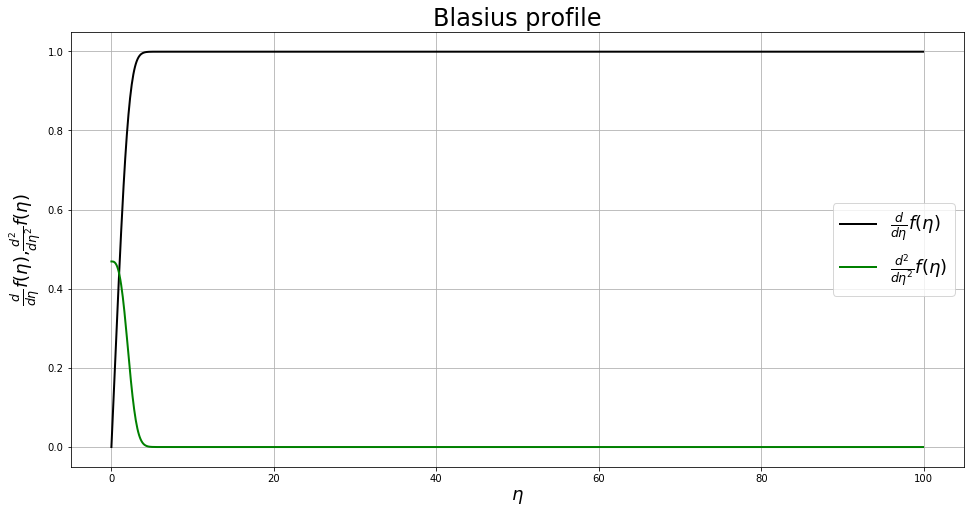

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

etalim=100
N=1000

def f(y,t):
    y1,y2,y3=y
    return [y2,y3,-y3*y1]

t=np.arange(0,etalim,etalim/N)
y0=[0,0,0.469]

#built-in method BDF allows to solve stiff systems of differential equations
[y1,y2,y3]=odeint(f,y0,t,full_output=False).T

%matplotlib inline

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.plot(t,y2,'-k',linewidth=2,label='$\\frac{d}{d \\eta} f{\\left (\\eta \\right )}$')
ax.plot(t,y3,'-g',linewidth=2,label='$\\frac{d^{2}}{d \\eta^{2}}  f{\\left (\\eta \\right )}$')
plt.ylabel('$\\frac{d}{d \\eta} f{\\left (\\eta \\right )}$,$\\frac{d^{2}}{d \\eta^{2}}  f{\\left (\\eta \\right )}$',\
           fontsize=18)
plt.xlabel('$\\eta$',fontsize=18)
plt.legend(fontsize=18,loc='center right')
plt.title('Blasius profile',fontsize=24)
ax.grid(True)
